<a href="https://colab.research.google.com/github/geffaa/emotion-prediction/blob/main/EmotionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import load_dataset

In [ ]:
dataset = load_dataset("emotion")

In [ ]:
def dataset_to_dataframe(dataset):
    texts = dataset["text"]
    labels = dataset["label"]
    df = pd.DataFrame({"text": texts, "emotion": labels})
    return df

# Konversi dataset ke DataFrame
train_df = dataset_to_dataframe(dataset["train"])
test_df = dataset_to_dataframe(dataset["test"])

# Mapping emosi
emotion_mapping = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}
train_df["emotion"] = train_df["emotion"].map(emotion_mapping)
test_df["emotion"] = test_df["emotion"].map(emotion_mapping)

print(train_df.head())
print(f"Jumlah data training: {len(train_df)}")
print(f"Jumlah data testing: {len(test_df)}")

                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
Jumlah data training: 16000
Jumlah data testing: 2000


In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

def text_to_sequences(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

X_train = text_to_sequences(train_df['text'])
X_test = text_to_sequences(test_df['text'])

# Label encoding
label_mapping = {v: k for k, v in emotion_mapping.items()}
y_train = train_df['emotion'].map(label_mapping)
y_test = test_df['emotion'].map(label_mapping)

print("Bentuk data training:", X_train.shape)
print("Bentuk data testing:", X_test.shape)

Bentuk data training: (16000, 100)
Bentuk data testing: (2000, 100)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.3320 - loss: 1.6350 - val_accuracy: 0.4794 - val_loss: 1.4447
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5455 - loss: 1.2435 - val_accuracy: 0.7375 - val_loss: 0.7549
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7942 - loss: 0.5866 - val_accuracy: 0.7916 - val_loss: 0.5980
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8700 - loss: 0.3817 - val_accuracy: 0.8341 - val_loss: 0.4973
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9084 - loss: 0.2844 - val_accuracy: 0.8269 - val_loss: 0.5456
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9400 - loss: 0.2078 - val_accuracy: 0.8616 - val_loss: 0.4729
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9593 - loss: 0.1602 - val_accuracy: 0.8641 - val_loss: 0.5316
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9577 - loss: 0.1447 - val_acc

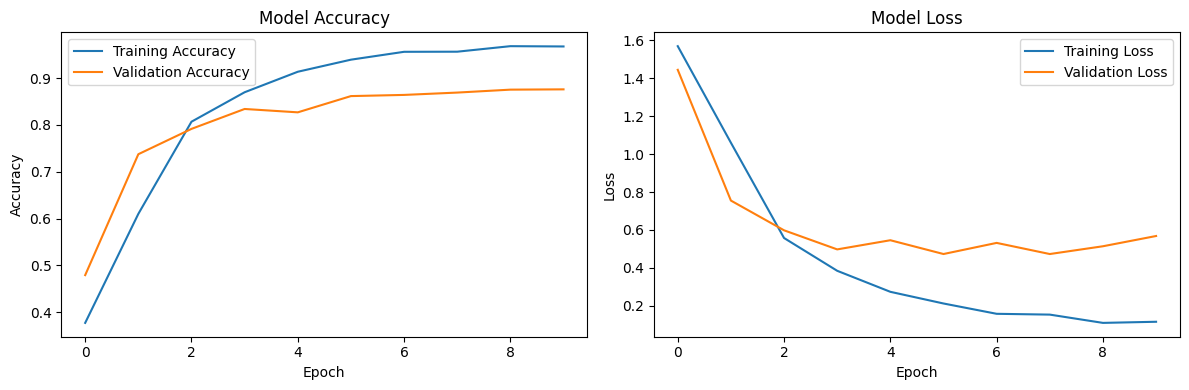

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def predict_emotion(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')
    prediction = model.predict(padded)
    predicted_emotion = emotion_mapping[np.argmax(prediction)]
    return predicted_emotion

# Contoh penggunaan
sample_texts = [
    "I'm so happy with the results of our team's hard work!",
    "I'm feeling really down today, everything seems to be going wrong.",
    "I can't believe how angry I am right now!",
    "I'm really scared about the upcoming presentation.",
    "What a pleasant surprise! I didn't expect this at all!"
]

for text in sample_texts:
    predicted_emotion = predict_emotion(text)
    print(f"Text: {text}")
    print(f"Predicted emotion: {predicted_emotion}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Text: I'm so happy with the results of our team's hard work!
Predicted emotion: joy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Text: I'm feeling really down today, everything seems to be going wrong.
Predicted emotion: joy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Text: I can't believe how angry I am right now!
Predicted emotion: anger

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Text: I'm really scared about the upcoming presentation.
Predicted emotion: fear

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Text: What a pleasant surprise! I didn't expect this at all!
Predicted emotion: joy



In [ ]:
# Mencoba beberapa sampel teks baru
new_samples = [
    "I can't believe I failed the exam. I'm so disappointed in myself.",
    "The surprise party they threw for me was amazing! I'm so touched!",
    "I'm furious about the way they treated my friend. It's unacceptable!",
    "I'm really nervous about my upcoming job interview.",
    "The sunset today was breathtakingly beautiful. I feel so peaceful."
]

for text in new_samples:
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')
    prediction = model_adjusted.predict(padded)
    predicted_emotion = emotion_mapping[np.argmax(prediction)]
    print(f"Text: {text}")
    print(f"Predicted emotion: {predicted_emotion}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
Text: I can't believe I failed the exam. I'm so disappointed in myself.
Predicted emotion: sadness

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Text: The surprise party they threw for me was amazing! I'm so touched!
Predicted emotion: surprise

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Text: I'm furious about the way they treated my friend. It's unacceptable!
Predicted emotion: anger

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Text: I'm really nervous about my upcoming job interview.
Predicted emotion: sadness

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Text: The sunset today was breathtakingly beautiful. I feel so peaceful.
Predicted emotion: joy



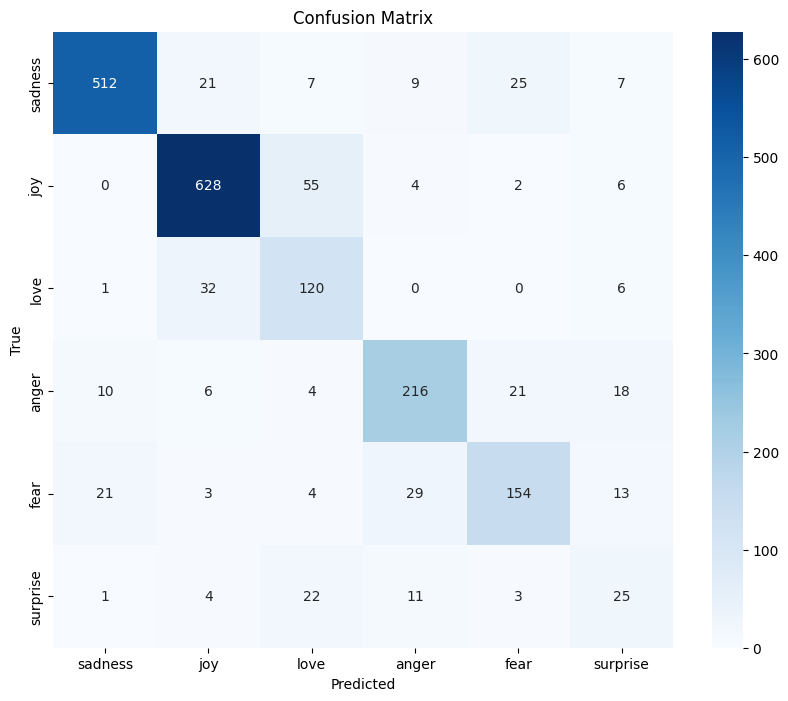

              precision    recall  f1-score   support

     sadness       0.94      0.88      0.91       581
         joy       0.90      0.90      0.90       695
        love       0.57      0.75      0.65       159
       anger       0.80      0.79      0.79       275
        fear       0.75      0.69      0.72       224
    surprise       0.33      0.38      0.35        66

    accuracy                           0.83      2000
   macro avg       0.72      0.73      0.72      2000
weighted avg       0.84      0.83      0.83      2000



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_mapping.values(),
            yticklabels=emotion_mapping.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes, target_names=emotion_mapping.values()))

In [ ]:
# Prediksi sampel baru
new_samples = [
    "I can't believe I failed the exam. I'm so disappointed in myself.",
    "The surprise party they threw for me was amazing! I'm so touched!",
    "I'm furious about the way they treated my friend. It's unacceptable!",
    "I'm really nervous about my upcoming job interview.",
    "The sunset today was breathtakingly beautiful. I feel so peaceful."
]

for text in new_samples:
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')
    prediction = model_adjusted.predict(padded)
    predicted_emotion = emotion_mapping[np.argmax(prediction)]
    print(f"Text: {text}")
    print(f"Predicted emotion: {predicted_emotion}")
    print(f"Confidence: {np.max(prediction):.2f}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Text: I can't believe I failed the exam. I'm so disappointed in myself.
Predicted emotion: sadness
Confidence: 0.99

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Text: The surprise party they threw for me was amazing! I'm so touched!
Predicted emotion: surprise
Confidence: 0.30

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Text: I'm furious about the way they treated my friend. It's unacceptable!
Predicted emotion: anger
Confidence: 0.73

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Text: I'm really nervous about my upcoming job interview.
Predicted emotion: sadness
Confidence: 0.93

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Text: The sunset today was breathtakingly beautiful. I feel so peaceful.
Predicted emotion: joy
Confidence: 0.99

